In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/dianakozachek/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
#df = pd.read_excel (r'Path where the Excel file is stored\File name.xlsx')
df = pd.read_excel('MENTAL.xlsx')
# adding an row_id field to the dataframe, which will be useful for joining later
df["Uuid"] = df.index + 1
#print first 10 rows 
print (df.head(5))

   Uuid                                              Title   Color    Shape  \
0     1                                      Mental Health  4CAF50     Ball   
1     2  I Am Worried About the Elderly health How To C...  907A47     Plus   
2     3                                             Health  E0C3DD     Plus   
3     4                                            Anxiety  1C1C1C     Ball   
4     5                                  Stigma In Society  3F51B5  Diamond   

      PositionX  PositionY  PositionZ  Group  
0 -7.750854e-01   0.370025   0.213730      7  
1 -3.341778e-01   0.525397  -0.086628      7  
2 -1.045334e+06   0.265556   0.542487      7  
3 -9.446453e-01   0.117676   0.282103      7  
4 -7.301590e-01   0.238134   0.479451      7  


# Preprocess, Clean

In [3]:
#creates a new data frame with "Uuid" and "Title" fields
df_subset = df[['Uuid', 'Title']].copy()
#data clean-up
#remove all non-aphabet characters
df_subset['Title'] = df_subset['Title'].str.replace("[^a-zA-Z#]", " ")
#covert to lower-case
df_subset['Title'] = df_subset['Title'].str.casefold()
print (df_subset.head(5))

   Uuid                                              Title
0     1                                      mental health
1     2  i am worried about the elderly health how to c...
2     3                                             health
3     4                                            anxiety
4     5                                  stigma in society


/var/folders/n8/cx4h3qg137d0ct7rm0p1bvpc0000gn/T/ipykernel_47501/234295493.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_subset['Title'] = df_subset['Title'].str.replace("[^a-zA-Z#]", " ")


In [4]:
# set up empty dataframe for staging output
df1=pd.DataFrame()
df1['Uuid']=['99999999999']
df1['sentiment_type']='NA999NA'
df1['sentiment_score']=0

In [5]:
print('Processing sentiment analysis:')
sid = SentimentIntensityAnalyzer()
t_df = df1
for index, row in df_subset.iterrows():
    scores = sid.polarity_scores(row[1])
    for key, value in scores.items():
        temp = [key,value,row[0]]
        df1['Uuid']=row[0]
        df1['sentiment_type']=key
        df1['sentiment_score']=value
        t_df=t_df.append(df1)
#remove dummy row with row_id = 99999999999
t_df_cleaned = t_df[t_df.Uuid != '99999999999']
#remove duplicates if any exist
t_df_cleaned = t_df_cleaned.drop_duplicates()
# only keep rows where sentiment_type = compound
t_df_cleaned = t_df[t_df.sentiment_type == 'compound']
print(t_df_cleaned.head(5))

Processing sentiment analysis:
   Uuid sentiment_type  sentiment_score
0     1       compound           0.0000
0     2       compound          -0.2960
0     3       compound           0.0000
0     4       compound          -0.1779
0     5       compound           0.0000


In [6]:
#merge dataframes
df_output = pd.merge(df, t_df_cleaned, on='Uuid', how='inner')
print(df_output.head(5))

   Uuid                                              Title   Color    Shape  \
0     1                                      Mental Health  4CAF50     Ball   
1     2  I Am Worried About the Elderly health How To C...  907A47     Plus   
2     3                                             Health  E0C3DD     Plus   
3     4                                            Anxiety  1C1C1C     Ball   
4     5                                  Stigma In Society  3F51B5  Diamond   

      PositionX  PositionY  PositionZ  Group sentiment_type  sentiment_score  
0 -7.750854e-01   0.370025   0.213730      7       compound           0.0000  
1 -3.341778e-01   0.525397  -0.086628      7       compound          -0.2960  
2 -1.045334e+06   0.265556   0.542487      7       compound           0.0000  
3 -9.446453e-01   0.117676   0.282103      7       compound          -0.1779  
4 -7.301590e-01   0.238134   0.479451      7       compound           0.0000  


# Visualize

In [7]:
df_output[["sentiment_score"]].describe()

,sentiment_score
count,246.000000
mean,-0.050439
std,0.280994
min,-0.670500
25%,-0.177900
50%,0.000000
75%,0.000000
max,0.757900


<AxesSubplot:title={'center':'Sentiment Score'}, xlabel='Group', ylabel='Mean Sentiment Score'>

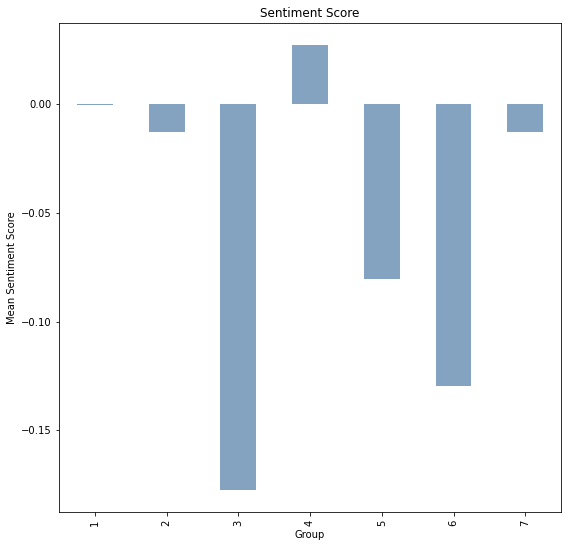

In [8]:
#generate mean of sentiment_score by period
dfg = df_output.groupby(['Group'])['sentiment_score'].mean()
#create a bar plot
dfg.plot(kind='bar', title='Sentiment Score', ylabel='Mean Sentiment Score',
         xlabel='Group', figsize=(9, 9), color=(0.2, 0.4, 0.6, 0.6))

In [9]:
import seaborn as sns

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7')])

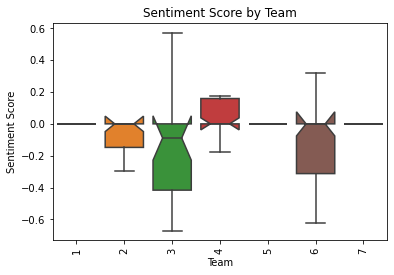

In [10]:
#create seaborn boxplots by group
sns.boxplot(x='Group', y='sentiment_score', notch = True,
            data=df_output, showfliers=False).set(title='Sentiment Score by Team')
#modify axis labels
plt.xlabel('Team')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=90)

<AxesSubplot:title={'center':'Sentiment Score'}, xlabel='Group', ylabel='Mean Sentiment Score'>

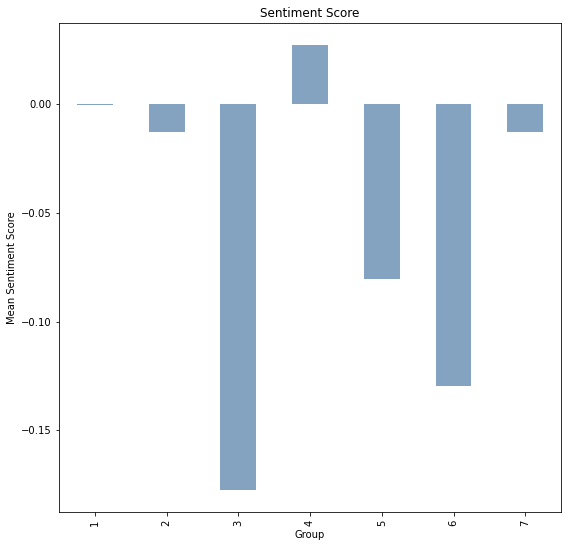

In [11]:
dfg.plot(kind='bar', title='Sentiment Score', ylabel='Mean Sentiment Score',
         xlabel='Group', figsize=(9, 9), color=(0.2, 0.4, 0.6, 0.6))